In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random

from sklearn.metrics import  classification_report
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score


%matplotlib inline 

In [31]:
import importlib
import ids_common
importlib.reload(ids_common)
SEED = random.randint(0, 42424242)
SEED = 19884136
print(f'SEED = {SEED}')

SEED = 19884136


ML-EdgeIIoT-dataset

In [72]:


target_label_2_class = 'Attack_label' # 0 indicates normal and 1 indicates attacks
target_label_15_class = 'Attack_type'

In [104]:
df_ferrag = pd.read_csv('./sampled_data/sample_1/clean_ml_sample_balanced_2_class_ferrag.csv', low_memory=False)

In [114]:
tmp = df_ferrag[df_ferrag['Attack_type'] == 'DDoS_HTTP']
replace = False
if tmp.shape[0] < 10000:
    replace = True
df_ferrag = pd.concat([df_ferrag, tmp.sample(n=8000, replace=replace)], ignore_index=True)
df_ferrag['Attack_type'].value_counts()

Attack_type
Normal                   119661
DDoS_TCP                  10000
DDoS_UDP                   9998
Backdoor                   9655
DDoS_ICMP                  9485
Ransomware                 8871
XSS                        8856
Port_Scanning              8850
OS_Fingerprinting          8846
SQL_injection              8841
Password                   8691
Uploading                  8501
Vulnerability_scanner      8209
DDoS_HTTP                  8002
Name: count, dtype: int64

<Axes: xlabel='Attack_type'>

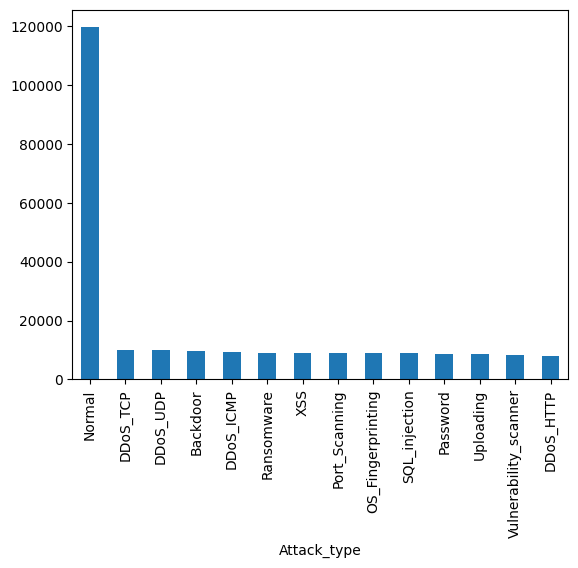

In [115]:
df_ferrag['Attack_type'].value_counts().plot.bar()

In [119]:
df_custom = pd.read_csv('./sampled_data/sample_1/clean_ml_sample_balanced_2_class.csv', low_memory=False)
df_custom.shape

(240446, 61)

In [121]:
df_custom['Attack_label'].value_counts()

Attack_label
1    120223
0    120223
Name: count, dtype: int64

<Axes: xlabel='Attack_type'>

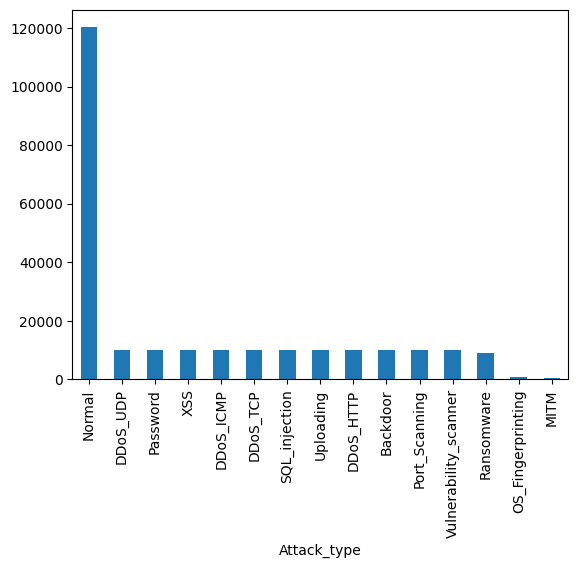

In [120]:
df_custom['Attack_type'].value_counts().plot.bar()

In [97]:
tmp = df_custom[df_custom['Attack_type'] == 'OS_Fingerprinting']
replace = False
if tmp.shape[0] < 10000:
    replace = True
df_custom = pd.concat([df_custom, tmp.sample(n=8000, replace=replace)], ignore_index=True)
df_custom['Attack_type'].value_counts()

In [96]:
df_custom['Attack_type'].value_counts()

Attack_type
Normal                   119652
DDoS_UDP                  10000
DDoS_TCP                  10000
Vulnerability_scanner      9971
Password                   9875
SQL_injection              9855
DDoS_HTTP                  9629
Uploading                  9618
Backdoor                   9612
DDoS_ICMP                  9513
XSS                        9348
Port_Scanning              8881
Ransomware                 8762
MITM                       7858
OS_Fingerprinting           823
Name: count, dtype: int64

<Axes: xlabel='Attack_type'>

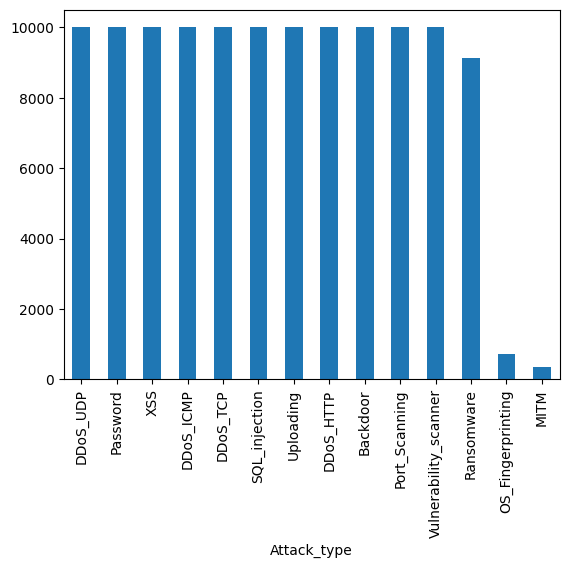

In [122]:
df_custom[df_custom['Attack_label']==1]['Attack_type'].value_counts().plot.bar()

<Axes: xlabel='Attack_label'>

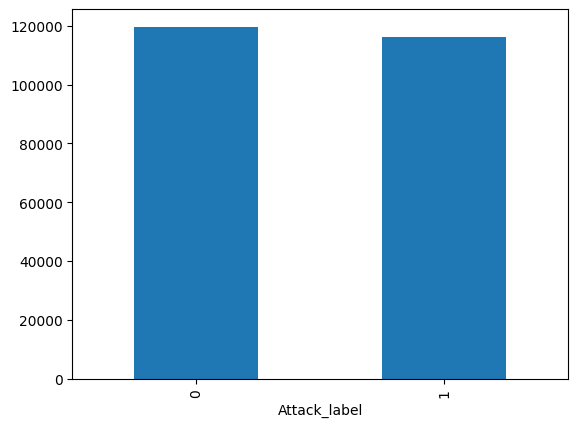

In [89]:
df_custom['Attack_label'].value_counts().plot.bar()

In [116]:
df_train_ferrag, df_test_ferrag = ids_common.ds_split(df_ferrag, seed=42)
X_train_ferrag, y_train_ferrag = ids_common.make_2_class(df_ferrag)
X_test_ferrag, y_test_ferrag = ids_common.make_2_class(df_ferrag)

DecisionTreeClassifier:
Train score: 1.0
Test score:  1.0
TRAIN:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    119661
           1       1.00      1.00      1.00    116805

    accuracy                           1.00    236466
   macro avg       1.00      1.00      1.00    236466
weighted avg       1.00      1.00      1.00    236466

TEST:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    119661
           1       1.00      1.00      1.00    116805

    accuracy                           1.00    236466
   macro avg       1.00      1.00      1.00    236466
weighted avg       1.00      1.00      1.00    236466



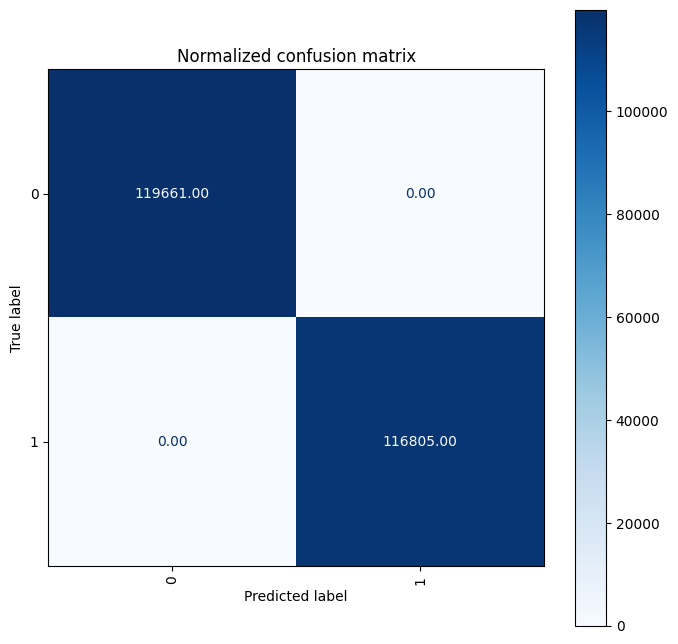

In [117]:
from sklearn.tree import DecisionTreeClassifier

class_2_ferrag = DecisionTreeClassifier(
        **{'criterion': 'entropy', 'max_depth': 16}, random_state=SEED)

# X_train, y_train = get_data('2_class', 'train')
# X_test, y_test = get_data('2_class', 'test')

class_2_ferrag.fit(X_train_ferrag, y_train_ferrag)

y_train_ferrag_predict = class_2_ferrag.predict(X_train_ferrag)
y_test_ferrag_predict = class_2_ferrag.predict(X_test_ferrag)

print(f'{class_2_ferrag.__class__.__name__}:')
print(f'Train score: {class_2_ferrag.score(X_train_ferrag, y_train_ferrag)}')
print(f'Test score:  {class_2_ferrag.score(X_test_ferrag, y_test_ferrag)}')

ids_common.report(y_train_ferrag, y_train_ferrag_predict, y_test_ferrag, y_test_ferrag_predict)
ids_common.plot_cm(y_test_ferrag, y_test_ferrag_predict, norm=None)

In [99]:
df_train_custom, df_test_custom = ids_common.ds_split(df_custom, seed=42)
X_train_custom, y_train_custom = ids_common.make_2_class(df_custom)
X_test_custom, y_test_custom = ids_common.make_2_class(df_custom)

DecisionTreeClassifier:
Train score: 0.9441958336813884
Test score:  0.9441958336813884
TRAIN:
              precision    recall  f1-score   support

           0       0.94      0.94      0.94    119652
           1       0.95      0.94      0.95    131745

    accuracy                           0.94    251397
   macro avg       0.94      0.94      0.94    251397
weighted avg       0.94      0.94      0.94    251397

TEST:
              precision    recall  f1-score   support

           0       0.94      0.94      0.94    119652
           1       0.95      0.94      0.95    131745

    accuracy                           0.94    251397
   macro avg       0.94      0.94      0.94    251397
weighted avg       0.94      0.94      0.94    251397



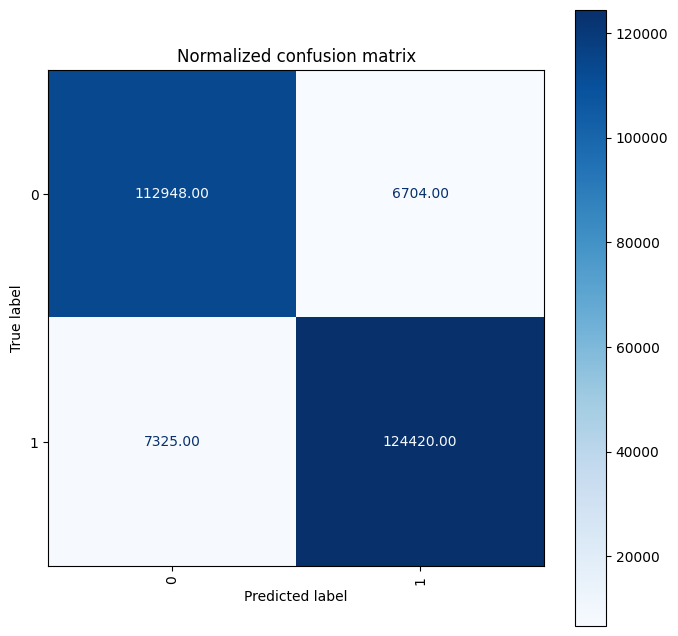

In [103]:
class_2_custom = DecisionTreeClassifier(
        **{'criterion': 'entropy', 'max_depth': 8}, random_state=SEED)

# X_train, y_train = get_data('2_class', 'train')
# X_test, y_test = get_data('2_class', 'test')

class_2_custom.fit(X_train_custom, y_train_custom)

y_train_predict = class_2_custom.predict(X_train_custom)
y_test_predict = class_2_custom.predict(X_test_custom)

print(f'{class_2_custom.__class__.__name__}:')
print(f'Train score: {class_2_custom.score(X_train_custom, y_train_custom)}')
print(f'Test score:  {class_2_custom.score(X_test_custom, y_test_custom)}')

ids_common.report(y_train_custom, y_train_predict, y_test_custom, y_test_predict)
ids_common.plot_cm(y_test_custom, y_test_predict, norm=None)

In [71]:
fetures_scores = sorted(zip(class_2_custom.feature_importances_.round(2),
           class_2_custom.feature_names_in_),
           reverse=True)[:10]
print(fetures_scores)

[(0.91, 'mqtt.topic-0.0'), (0.09, 'http.tls_port'), (0.0, 'udp.time_delta'), (0.0, 'udp.stream'), (0.0, 'tcp.seq'), (0.0, 'tcp.len'), (0.0, 'tcp.flags.ack'), (0.0, 'tcp.flags'), (0.0, 'tcp.connection.synack'), (0.0, 'tcp.connection.syn')]


In [20]:


fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,10))

disp = ConfusionMatrixDisplay.from_predictions(
        y_test_ferrag_predict,
        y_predict,
        # display_labels=Attack_type_classes,
        cmap=plt.cm.Blues,
        normalize='true',
        values_format='.2f'
    )
    disp.ax_.set_title(title)
    disp.figure_.set_size_inches(8, 8, forward=True)


plot_confusion_matrix(class_2_custom, 
                          X_test_custom, 
                          y_test_custom, 
                          ax=axes[0], 
                          cmap='Blues')

    # ax.title.set_text(type(cls).__name__)
plt.tight_layout()  
plt.show()

ImportError: cannot import name 'plot_confusion_matrix' from 'sklearn.metrics' (c:\Users\pro17\anaconda3\envs\ids\Lib\site-packages\sklearn\metrics\__init__.py)

In [124]:
y_dt_score = dt_cls.predict_proba(X_test)[:, 1]  
y_dt_best_score = dt_best.predict_proba(X_test)[:, 1]  

fpr1, tpr1, _ = roc_curve(y_test, y_dt_score)
roc_auc1 = auc(fpr1, tpr1)

fpr2, tpr2, _ = roc_curve(y_test, y_dt_best_score)
roc_auc2 = auc(fpr2, tpr2)

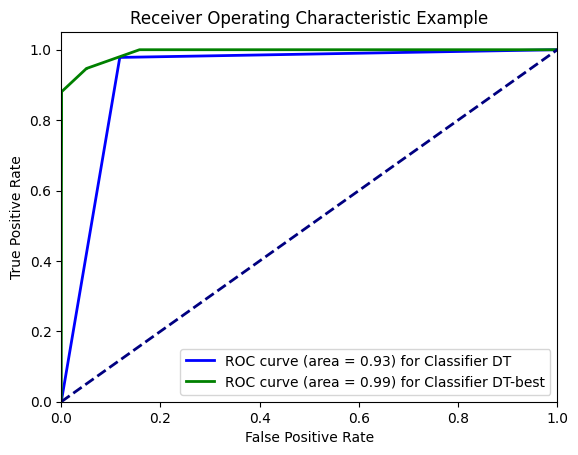

In [125]:
plt.figure()
plt.plot(fpr1, tpr1, color='blue', lw=2, label='ROC curve (area = %0.2f) for Classifier DT' % roc_auc1)
plt.plot(fpr2, tpr2, color='green', lw=2, label='ROC curve (area = %0.2f) for Classifier DT-best' % roc_auc2)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Example')
plt.legend(loc="lower right")
plt.show()

15 classes

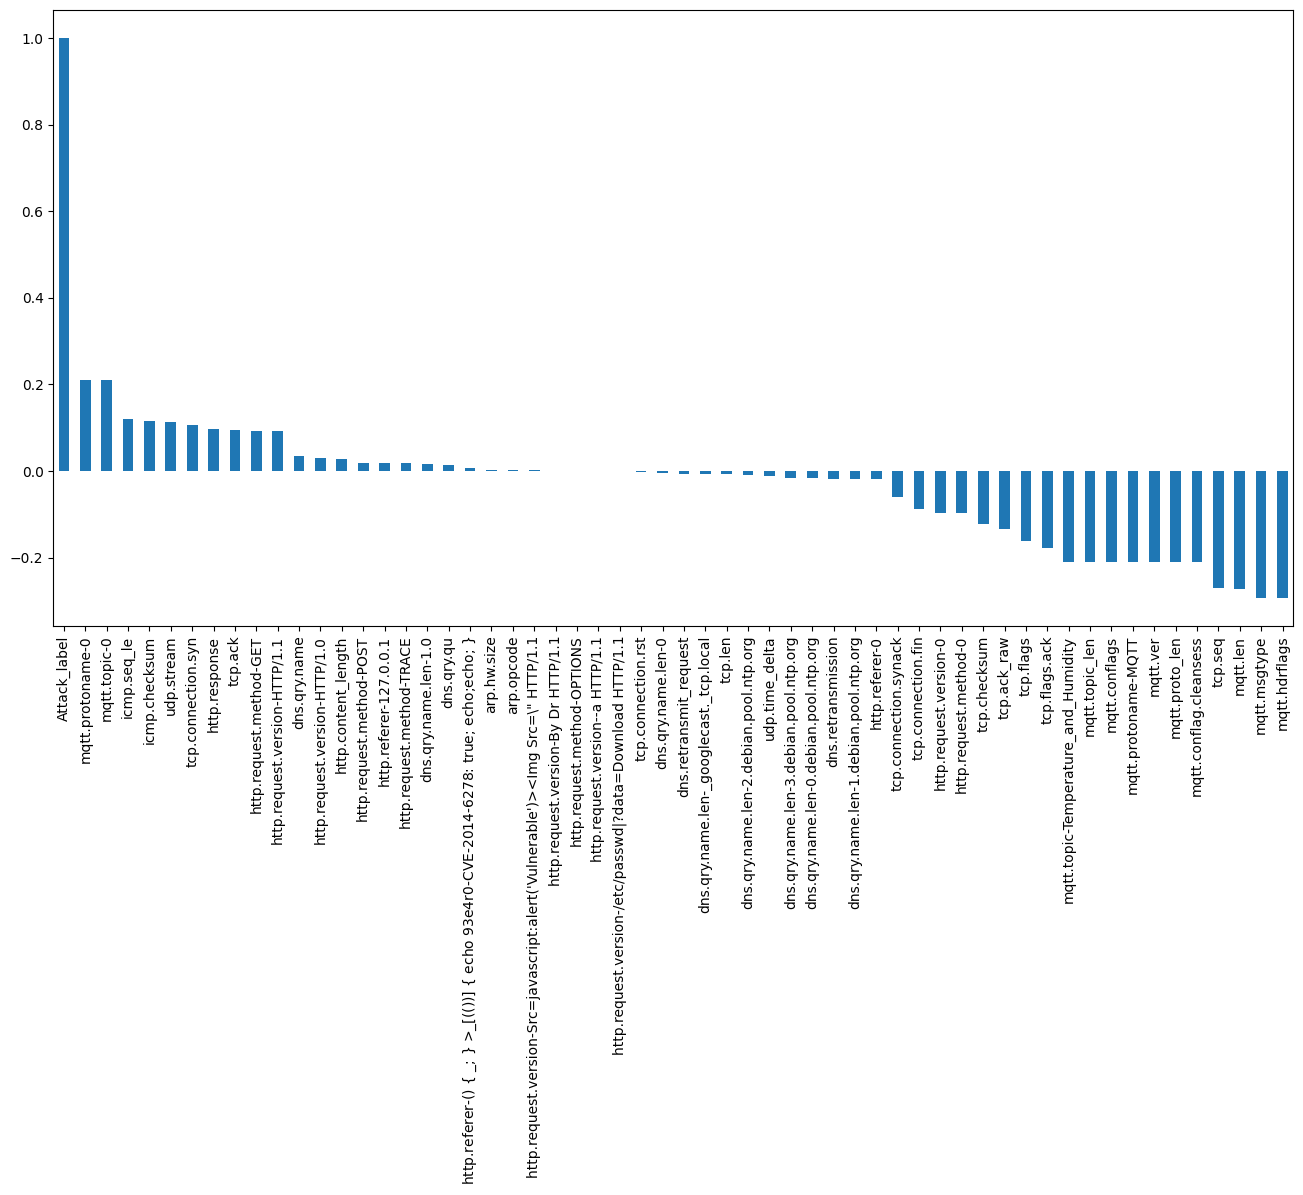

Attack_label                                                                         1.000000
mqtt.protoname-0                                                                     0.209794
mqtt.topic-0                                                                         0.209455
icmp.seq_le                                                                          0.121136
icmp.checksum                                                                        0.116376
udp.stream                                                                           0.114264
tcp.connection.syn                                                                   0.107291
http.response                                                                        0.096792
tcp.ack                                                                              0.094671
http.request.method-GET                                                              0.092900
http.request.version-HTTP/1.1                               

In [75]:

tdf = df.drop([target_label_15_class], axis=1, inplace=False).copy()
# # df[target_label_15_class_cat], Attack_type_classes = pd.factorize(df[target_label_15_class])
# tdf['attack-type'], Attack_type_classes = pd.factorize(df[target_label_15_class])


corr = tdf.corr()
corr = corr[target_label_2_class]

corr = corr.sort_values(ascending=False)

ax = corr.plot.bar(figsize=(16, 8))
# ax.bar_label(ax.containers[0])

plt.xticks(rotation=90)
plt.show()

print(corr)
